# STARTUP SUCCESS PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('startup_data.csv')
train,test=train_test_split(df,test_size=0.3,random_state=25)

In [3]:
train.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
860,528,CA,33.916552,-118.397491,CA 90245,c:30152,"El Segundo,",NaN,CHiL Semiconductor,1,...,c:30152,1,0,0,1,1,0,2.3333,1,acquired
111,274,CA,37.382137,-121.970505,95054,c:17620,Santa Clara,NaN,Woven Systems,1,...,c:17620,0,0,1,1,0,0,2.5000,1,acquired
524,1094,TN,36.162230,-86.774353,37201,c:83142,Nashville,Nashville TN 37201,RentStuff.com,1,...,c:83142,0,1,0,0,0,0,1.5000,0,acquired
630,717,CA,37.288136,-121.797650,95138,c:41409,San Jose,San Jose CA 95138,Taggstr,0,...,c:41409,0,1,0,0,0,0,1.0000,0,closed
605,887,CA,37.409147,-122.015463,94089,c:5347,Sunnyvale,NaN,VirtualLogix,1,...,c:5347,1,0,1,1,1,0,2.6667,1,acquired


In [4]:
test.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
61,1112,CA,37.805289,-122.404448,94111,c:8596,San Francisco,NaN,Carbonetworks,0,...,c:8596,0,0,1,0,0,0,1.0,1,closed
35,785,NY,40.739010,-73.997259,10011,c:45111,New York,New York NY 10011,Entertainment Media Works,0,...,c:45111,0,0,0,1,0,0,1.0,1,closed
814,949,CA,34.050451,-118.437775,90024,c:59298,Los Angeles,Los Angeles CA 90024,Diversion,0,...,c:59298,0,1,0,1,0,0,2.0,1,closed
637,400,CO,39.560486,-104.865625,80112,c:23788,Englewood,NaN,ZettaCore,0,...,c:23788,1,0,0,0,0,0,5.0,1,closed
280,119,FL,26.106273,-80.418940,33327,c:144687,Weston,Weston FL 33327,DateMyFamily.com,0,...,c:144687,0,1,0,0,0,0,1.0,0,closed


In [5]:
print(train)

     Unnamed: 0 state_code   latitude   longitude  zip_code       id  \
860         528         CA  33.916552 -118.397491  CA 90245  c:30152   
111         274         CA  37.382137 -121.970505     95054  c:17620   
524        1094         TN  36.162230  -86.774353     37201  c:83142   
630         717         CA  37.288136 -121.797650     95138  c:41409   
605         887         CA  37.409147 -122.015463     94089   c:5347   
..          ...        ...        ...         ...       ...      ...   
317         425         CA  37.451026 -122.186760     94025    c:251   
143         158         CA  37.400367 -121.985711     95054  c:15562   
474         262         CA  37.791500 -122.400450     94104  c:17430   
318          64         CO  39.540323 -104.857271     80112  c:12285   
132          58         CA  37.559110 -122.303493     95054  c:12173   

              city          Unnamed: 6                name  labels  ...  \
860    El Segundo,                 NaN  CHiL Semiconductor  

In [6]:
print(test)

     Unnamed: 0 state_code   latitude   longitude zip_code        id  \
61         1112         CA  37.805289 -122.404448    94111    c:8596   
35          785         NY  40.739010  -73.997259    10011   c:45111   
814         949         CA  34.050451 -118.437775    90024   c:59298   
637         400         CO  39.560486 -104.865625    80112   c:23788   
280         119         FL  26.106273  -80.418940    33327  c:144687   
..          ...        ...        ...         ...      ...       ...   
856         907         NY  40.730646  -73.986614    10010   c:55122   
299         561         CA  37.548270 -121.988572    94538   c:31764   
9           846         CA  37.427235 -122.145783    94306     c:498   
134        1020         OH  39.099909  -84.504243    45202   c:70021   
150         494         GA  33.774486  -84.385448    30308   c:28114   

              city            Unnamed: 6                       name  labels  \
61   San Francisco                   NaN              Ca

In [7]:
train.shape

(646, 49)

In [8]:
test.shape

(277, 49)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 860 to 132
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                646 non-null    int64  
 1   state_code                646 non-null    object 
 2   latitude                  646 non-null    float64
 3   longitude                 646 non-null    float64
 4   zip_code                  646 non-null    object 
 5   id                        646 non-null    object 
 6   city                      646 non-null    object 
 7   Unnamed: 6                303 non-null    object 
 8   name                      646 non-null    object 
 9   labels                    646 non-null    int64  
 10  founded_at                646 non-null    object 
 11  closed_at                 237 non-null    object 
 12  first_funding_at          646 non-null    object 
 13  last_funding_at           646 non-null    object 
 14  age_firs

In [10]:
train.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,548.000000,548.000000,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,564.698142,38.607539,-103.477873,0.643963,2.144750,3.882267,2.953935,4.664239,7.975232,2.351393,...,0.004644,0.325077,0.331269,0.249226,0.506192,0.396285,0.238390,0.100619,2.754615,0.812693
std,333.429421,3.692397,22.159384,0.479197,2.476370,2.936777,2.998880,3.226644,7.582068,1.443098,...,0.068041,0.468767,0.471034,0.432900,0.500349,0.489504,0.426429,0.301057,1.777599,0.390460
min,2.000000,28.032975,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,274.250000,37.391906,-122.191607,0.000000,0.543825,1.657550,1.000000,2.251400,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,564.500000,37.779281,-118.247910,1.000000,1.335600,3.471200,2.386300,4.334250,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000
75%,855.500000,40.730646,-77.548501,1.000000,3.474650,5.440425,4.561675,6.697950,10.000000,3.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.500000,1.000000
max,1152.000000,54.983201,-1.574631,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.500000,1.000000


In [11]:
train.corr()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.040529,0.032328,-0.089721,-0.020108,-0.119819,-0.143803,-0.140119,-0.120143,-0.100924,...,-0.047433,-0.009489,-0.007862,0.127997,-0.096020,-0.112685,-0.077228,-0.094205,-0.030132,-0.006449
latitude,0.040529,1.000000,0.366909,-0.008830,-0.042094,-0.050930,-0.084049,-0.068236,-0.088730,-0.026198,...,-0.042773,-0.043116,0.043634,0.033963,-0.030316,-0.019721,-0.075975,-0.060342,-0.078612,0.009162
longitude,0.032328,0.366909,1.000000,-0.025935,-0.025467,-0.011394,-0.045725,-0.092533,-0.087965,0.012164,...,0.025497,-0.060817,0.010256,0.109562,-0.082646,-0.097473,-0.015542,-0.057972,-0.060462,-0.076211
labels,-0.089721,-0.008830,-0.025935,1.000000,-0.073894,0.090614,0.169120,0.258258,0.342782,0.194649,...,0.003239,-0.043014,-0.074237,-0.087279,0.209663,0.258733,0.150451,0.119745,0.189345,0.305918
age_first_funding_year,-0.020108,-0.042094,-0.025467,-0.073894,1.000000,0.746001,0.592359,0.484532,-0.157258,-0.161492,...,-0.012769,0.116301,0.133291,-0.347849,-0.281408,-0.086498,0.042576,0.124455,0.098457,0.043723
age_last_funding_year,-0.119819,-0.050930,-0.011394,0.090614,0.746001,1.000000,0.714532,0.659277,0.134373,0.391398,...,0.037070,0.096199,0.329307,-0.346793,-0.074040,0.251977,0.322925,0.321513,0.138512,0.215504
age_first_milestone_year,-0.143803,-0.084049,-0.045725,0.169120,0.592359,0.714532,1.000000,0.779661,0.297442,0.211230,...,0.076723,0.035647,0.093696,-0.284251,0.020613,0.208124,0.221779,0.247161,0.084243,0.176839
age_last_milestone_year,-0.140119,-0.068236,-0.092533,0.258258,0.484532,0.659277,0.779661,1.000000,0.394751,0.275771,...,0.057946,0.017362,0.071275,-0.241102,0.125276,0.274740,0.282021,0.243500,0.114785,0.232333
relationships,-0.120143,-0.088730,-0.087965,0.342782,-0.157258,0.134373,0.297442,0.394751,1.000000,0.378132,...,0.087376,-0.067961,-0.021141,-0.097783,0.340877,0.325972,0.290499,0.206894,0.124836,0.222047
funding_rounds,-0.100924,-0.026198,0.012164,0.194649,-0.161492,0.391398,0.211230,0.275771,0.378132,1.000000,...,0.030724,-0.015568,0.339391,0.020910,0.268602,0.460996,0.430529,0.318173,0.071098,0.279327


In [12]:
cat_feature=train.select_dtypes(include='object')
cat_feature.head(5)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
860,CA,CA 90245,c:30152,"El Segundo,",NaN,CHiL Semiconductor,1/1/2006,NaN,1/1/2006,5/7/2008,CA,semiconductor,c:30152,acquired
111,CA,95054,c:17620,Santa Clara,NaN,Woven Systems,1/1/2003,NaN,12/1/2005,9/25/2007,CA,network_hosting,c:17620,acquired
524,TN,37201,c:83142,Nashville,Nashville TN 37201,RentStuff.com,1/1/2010,NaN,5/5/2011,4/12/2012,TN,web,c:83142,acquired
630,CA,95138,c:41409,San Jose,San Jose CA 95138,Taggstr,7/1/2009,7/1/2013,4/7/2010,4/7/2010,CA,messaging,c:41409,closed
605,CA,94089,c:5347,Sunnyvale,NaN,VirtualLogix,1/1/2002,NaN,1/1/2004,1/12/2010,CA,software,c:5347,acquired


In [13]:
X=train.drop('status',axis=1)
y=train['status']

In [14]:
train=train.drop(['state_code','id','Unnamed: 6','state_code.1','category_code','object_id','labels'],axis=1)
test=test.drop(['state_code','id','Unnamed: 6','state_code.1','category_code','object_id','labels'],axis=1)
train=train.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
test=test.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
train = train.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)
train = train.drop(['latitude','longitude'],axis=1)
test = test.drop(['latitude','longitude'],axis=1)


In [15]:
train=train.drop(['has_roundA','has_roundB','has_roundC','has_roundD','is_top500','is_TX','is_MA','is_CA','is_NY','is_otherstate','age_first_funding_year','has_VC',
                  'has_angel','age_last_funding_year','age_first_milestone_year','age_last_milestone_year'],axis=1)
test=test.drop(['has_roundA','has_roundB','has_roundC','has_roundD','is_top500','is_TX','is_MA','is_CA','is_NY','is_otherstate','age_first_funding_year','has_VC',
                'has_angel','age_last_funding_year','age_first_milestone_year','age_last_milestone_year'],axis=1)
train=train.drop(['is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis=1)
test=test.drop(['is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis=1)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [17]:
print(y_train)

582    acquired
320    acquired
763    acquired
444    acquired
708    acquired
         ...   
830    acquired
184      closed
168    acquired
391    acquired
626      closed
Name: status, Length: 516, dtype: object


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

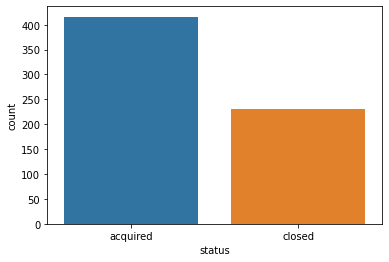

In [18]:
sns.countplot(train['status'])

In [19]:
train.isnull().sum()

relationships        0
funding_rounds       0
funding_total_usd    0
milestones           0
avg_participants     0
status               0
dtype: int64

In [20]:
print("After Filling Null Value, Total Null Value is",train.isnull().sum().sum())

After Filling Null Value, Total Null Value is 0


In [21]:
train.head

<bound method NDFrame.head of      relationships  funding_rounds  funding_total_usd  milestones  \
860              7               3           22487000           2   
111              1               2           30000000           0   
524              3               2             675000           1   
630              1               1              50000           1   
605              9               4           29288979           1   
..             ...             ...                ...         ...   
317             16               3           21500000           4   
143              4               1            4410000           1   
474             16               2            4200000           2   
318              5               1            4000000           1   
132              9               3            9500000           2   

     avg_participants    status  
860            2.3333  acquired  
111            2.5000  acquired  
524            1.5000  acquired  
630  

In [22]:
train.size

3876

In [23]:
train.shape

(646, 6)

In [24]:
train.ndim

2

In [25]:
X = train.drop('status', axis = 1)
y = train['status']
X_test = test

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(516, 48)
(516,)
(277, 6)
(130,)


In [45]:
train.head()

,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,status
860,7,3,22487000,2,2.3333,acquired
111,1,2,30000000,0,2.5000,acquired
524,3,2,675000,1,1.5000,acquired
630,1,1,50000,1,1.0000,closed
605,9,4,29288979,1,2.6667,acquired


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [47]:
X_train=train
y_test

261    acquired
223      closed
508    acquired
439      closed
749      closed
         ...   
701      closed
27     acquired
583    acquired
709    acquired
155    acquired
Name: status, Length: 130, dtype: object

## RANDOM FOREST CLASSIFIER

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
le = LabelEncoder()
y = le.fit_transform(y)
rf = RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=100, min_samples_split=20, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest Algorithm:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cnf_matrix_rf)

Random Forest Algorithm:
Accuracy: 0.7461538461538462
Precision: 0.5428571428571428
Recall: 0.5277777777777778
F1 Score: 0.5352112676056338
Confusion Matrix:
[[78 16]
 [17 19]]


## LOGISTIC REGRESSION

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lg = logreg.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
print("Logistic Regression:")
print("Accuracy:", accuracy_lg)
print("Precision:", precision_lg)
print("Recall:", recall_lg)
print("F1 Score:", f1_lg)
cnf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
print("Confusion Matrix:")
print(cnf_matrix_lg)

Logistic Regression:
Accuracy: 0.7384615384615385
Precision: 0.5238095238095238
Recall: 0.6111111111111112
F1 Score: 0.5641025641025642
Confusion Matrix:
[[74 20]
 [14 22]]


## SUPPORT VECTOR MACHINE

In [110]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Evaluation Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cnf_matrix_svm)

Support Vector Machine (SVM) Evaluation Metrics:
Accuracy: 0.7692307692307693
Precision: 0.6071428571428571
Recall: 0.4722222222222222
F1 Score: 0.53125
Confusion Matrix:
[[83 11]
 [19 17]]


## Gaussian Naive Bayes 

In [114]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_naive = nb_classifier.predict(X_test)
accuracy_naive = accuracy_score(y_test, y_pred_naive)
precision_naive = precision_score(y_test, y_pred_naive)
recall_naive = recall_score(y_test, y_pred_naive)
f1_naive = f1_score(y_test, y_pred_naive)
print("Naive Bayes Evaluation Metrics:")
print("Accuracy:", accuracy_naive)
print("Precision:", precision_naive)
print("Recall:", recall_naive)
print("F1 Score:", f1_naive)
cnf_matrix_naive = confusion_matrix(y_test, y_pred_naive)
print("Confusion Matrix:")
print(cnf_matrix_naive)

Naive Bayes Evaluation Metrics:
Accuracy: 0.4153846153846154
Precision: 0.3148148148148148
Recall: 0.9444444444444444
F1 Score: 0.4722222222222222
Confusion Matrix:
[[20 74]
 [ 2 34]]


## KNearestNeighbor 

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN) Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cnf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cnf_matrix)

K-Nearest Neighbors (KNN) Evaluation Metrics:
Accuracy: 0.7153846153846154
Precision: 0.4878048780487805
Recall: 0.5555555555555556
F1 Score: 0.5194805194805195
Confusion Matrix:
[[73 21]
 [16 20]]


In [119]:
train.head()

,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,status
860,7,3,22487000,2,2.3333,acquired
111,1,2,30000000,0,2.5000,acquired
524,3,2,675000,1,1.5000,acquired
630,1,1,50000,1,1.0000,closed
605,9,4,29288979,1,2.6667,acquired


In [122]:
svm.predict([[2,2,1300000,1,1.0000]])[0]

0

In [123]:
import pickle
with open('predict.pkl','wb') as file:
    pickle.dump(rf,file)

In [124]:
train['status'].value_counts

<bound method IndexOpsMixin.value_counts of 860    acquired
111    acquired
524    acquired
630      closed
605    acquired
         ...   
317    acquired
143    acquired
474    acquired
318    acquired
132    acquired
Name: status, Length: 646, dtype: object>

In [126]:
svm_model=pickle.load(open('predict.pkl','rb'))

In [127]:
svm_model.predict([[2,2,1300000,1,1.00000]])[0]

0